<h1 style='color: black'>Лабораторная работа №3</h1>

<h2 style='color: black'>Выполнила: Хренникова Ангелина, 208 группа</h2>

<h3 style='color: black'>Задание 1</h3>

Исследуется двухвидовая модель «хищник – жертва», впервые построенная Вольтерра для объяснения колебаний рыбных уловов. Имеется два биологических вида, численностью в момент времени $t$ соответственно $x(t)$ и $y(t)$. Особи первого вида являются пищей для особей второго вида (хищников). Численности популяций в начальный момент времени известны. Требуется определить численность видов в произвольный момент времени. Математической моделью задачи является система дифференциальных уравнений Лотки – Вольтерра:$$\begin{cases}
    \large{\frac{dx}{dt} = (a-by)x} \\
    \large{\frac{dy}{dt} = (-c+dx)y}
\end{cases}$$
где $a, b, c, d$ – положительные константы. 

Проводится расчет численности популяций при $a = 3, c = 1, d = 1$ для трех значений параметра $b = 4;3;2$. Начальные значения полагаются $x(0) = 2, y(0) = 1$.

Исходный код:

(0.0, 3.0)

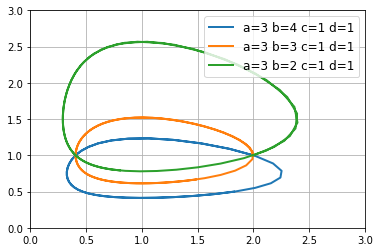

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def f(y, t,params):
    y1, y2 = y
    a,b,c,d=params
    return [y1*(a-b*y2),y2*(-c+d*y1)]

t = np.linspace(0,7,71)
y0 = [2, 1]
fig = plt.figure(facecolor='white')

for b in range(4,1,-1):
    params=[3,b,1,1]
    st='a=%d b=%d c=%d d=%d' % tuple(params)
    [y1,y2]=odeint(f, y0, t,args=(params,), full_output=False).T
    plt.plot(y1,y2,linewidth=2, label=st)

plt.legend(fontsize=12)
plt.grid(True)
plt.xlim(0,3)
plt.ylim(0,3)

Новый код:

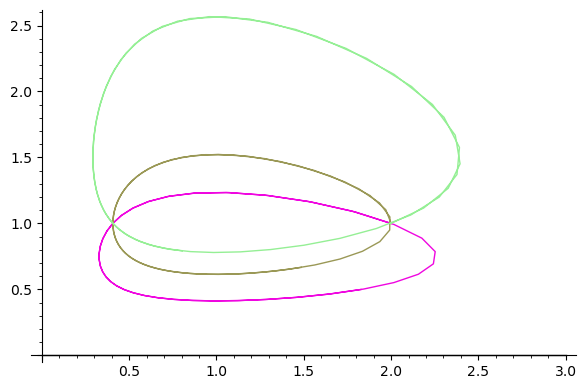

In [4]:
var('y1, y2')

t = np.linspace(0,7,71)
y0 = [2, 1]
a,c,d = 3,1,1

pt = plot(0, (x, 0, 3), color='black')

for b in range(4,1,-1):
    params=[a,b,c,d]
    st='a=%d b=%d c=%d d=%d' % tuple(params)
    f = [y1*(a-b*y2),y2*(-c+d*y1)]
    sol=desolve_odeint(f, y0, t, dvars=[y1, y2])
    pt += line(sol,rgbcolor=(randint(0,256)/256,randint(0,256)/256,randint(0,256)/256))
pt.show()

Графики совпали.

<h3 style='color: black'>Задание 2</h3>

Решается задача Коши, описывающая движение тела, брошенного с начальной скоростью $v0$ под углом $\alpha$ к горизонту в предположении, что сопротивление воздуха пропорционально квадрату скорости. В векторной форме уравнение движения имеет вид
$m\ddot{r}=-\gamma v|v|mg$ ,где $r(t)$ радиус – вектор движущегося тела, $v=\dot{r}(t)$ – вектор скорости тела, $\gamma$ – коэффициент сопротивления, $mg$ вектор силы веса тела массы $m$, $g$ – ускорение свободного падения. 

Особенность этой задачи состоит в том, что движение заканчивается в заранее неизвестный момент времени, когда тело падает на землю.

Если обозначить $k=\gamma/m$, то в координатной форме получается система уравнений 
$$\ddot{x}=-k\dot{x}\sqrt{\dot{x}^2+\dot{y}^2}$$
$$\ddot{y}=-k\dot{y}\sqrt{\dot{x}^2+\dot{y}^2}-g$$
к которой добавляются начальные условия: $x(0)=0$, $y(0)=h$ ($h$ начальная высота), 
$\dot{x}(0) = v_0cos\alpha, \dot{y}(0) = v_0sin\alpha$.

Полагается $y_1=x$, $y_2=\dot{x}$, $y_3=y$, $y_4=\dot{y}$. Тогда соответствующая система 
ОДУ 1 – го порядка принимает вид 
$$\begin{cases}
    y_1^\prime = y2 \\
    y_2^\prime = -ky_2 \sqrt{y_2^2+y_4^2} \\
    y_3^\prime = y4 \\
    y_4^\prime = -ky_4 \sqrt{y_2^2+y_4^2}-g
\end{cases}$$
Для модельной задачи полагается $h=0$, $k=0.01$, $g=9.81$, $v_0=10$, $\alpha=π/4$.

Исходный код:

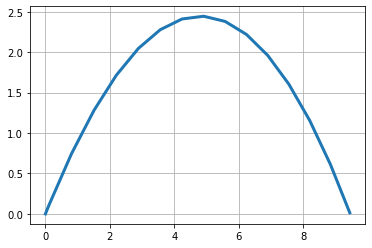

In [5]:
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt

ts = []
ys = []

def fout(t, y): # обработчик шага
    ts.append(t)
    ys.append(list(y.copy()))

def f(t, y): # функция правой части системы ОДУ
    k = 0.01
    g = 9.81
    y1, y2, y3, y4 = y
    return [y2, -k * y2 * sqrt(y2**2 + y4**2), y4, -k * y4 * sqrt(y2**2 + y4**2) - g]

# Решаем ОДУ и строим его график.
tmax = 1.41 # время движения, подбирается экспериментально
alph = np.pi/4 # угол бросания тела
v0 = 10.0 # начальная скорость

ODE = ode(f)
y0, t0 = [0, v0 * np.cos(alph), 0, v0 * np.sin(alph)], 0 # начальные условия
r = ODE.set_integrator('dopri5', max_step=0.1) # метод Рунге – Кутта
r.set_solout(fout) # загрузка обработчика шага
r = ODE.set_initial_value(y0, t0) # задание начальных значений
ret = r.integrate(tmax) # решаем ОДУ
Y = np.array(ys)
fig, ax = plt.subplots()
fig.set_facecolor('white')
ax.plot(Y[:,0],Y[:,2],linewidth=3) # график решения
ax.grid(True)

Новый код:

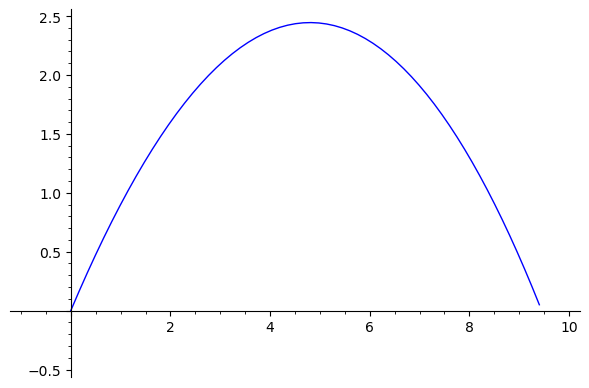

In [6]:
import numpy as np

var("y1 y2 y3 y4")

t = np.linspace(0, 7, 300) 
tmax = 1.41 
alph = np.pi/4 
k = 0.01
g = 9.81
v0 = 10.0 

y0 = [0, v0 * np.cos(alph), 0, v0 * np.sin(alph)]
t0 = 0
f = [y2, -k * y2 * sqrt(y2**2 + y4**2), y4, -k * y4 * sqrt(y2**2 + y4**2) - g] 

sol = desolve_odeint(f, y0, t, dvars=[y1, y2, y3, y4]) 

arr = []
for row in sol:
    if row[0] >= 0 and row[2] >= 0:
        arr.append([row[0], row[2]])

line(arr).show(xmin = -1, xmax = 10, ymin = -0.5, ymax = 2.5)

Графики совпали.